In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [4]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [5]:
from costs import compute_mse
from costs import compute_rmse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test = (list(),list()) # first the y then the x
    train = (list(),list()) # first the y then the x
    assert len(x) == len (y)
    for i in range(len(x)):
        if i in k_indices[k]: 
            test[0].append(y[i])
            test[1].append(x[i])
        else:
            train[0].append(y[i])
            train[1].append(x[i])
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    tx_train = build_poly(np.array(train[1]),degree)
    tx_test = build_poly(np.array(test[1]),degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = ridge_regression(np.array(train[0]),tx_train,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_rmse(train[0],tx_train,w)
    loss_te = compute_rmse(test[0],tx_test,w)
    return loss_tr, loss_te

0.0001 0 1.15287368431 4.37467595823
0.0001 1 1.13210273201 0.988327368753
0.0001 2 1.1574581127 0.980157227392
0.0001 3 0.75142761109 1.85763575511
0.000161026202756 0 1.16090936262 3.01234172042
0.000161026202756 1 1.1323155945 0.989917091262
0.000161026202756 2 1.1580773015 0.985231289556
0.000161026202756 3 0.755560145053 1.84916487897
0.00025929437974 0 1.1699860917 1.87228045562
0.00025929437974 1 1.13265995316 0.991370700347
0.00025929437974 2 1.15877265408 0.990988366565
0.00025929437974 3 0.760387219784 1.84020518748
0.000417531893656 0 1.17918852804 1.07350589594
0.000417531893656 1 1.13319658709 0.992540369975
0.000417531893656 2 1.15947885565 0.997301832915
0.000417531893656 3 0.765424008826 1.83094679996
0.00067233575365 0 1.18760112314 0.786824918847
0.00067233575365 1 1.13403294713 0.993395137167
0.00067233575365 2 1.16019125743 1.00428513497
0.00067233575365 3 0.770450709909 1.82148986535
0.00108263673387 0 1.19479425803 0.9014995611
0.00108263673387 1 1.13539317236 0.9

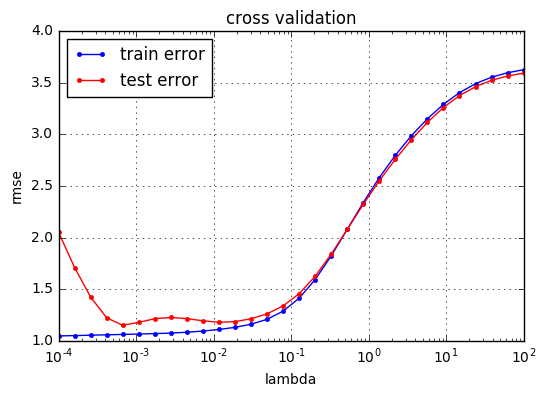

In [19]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for l in lambdas:
        rmse_tr.append(0.0)
        rmse_te.append(0.0)
        for i in range(k_fold):
            loss_tr, loss_te = cross_validation(x,y,k_indices,i,l,degree)
            print(l,i,loss_tr, loss_te)
            rmse_tr[-1]+= loss_tr
            rmse_te[-1]+= loss_te
        rmse_tr[-1]/=k_fold
        rmse_te[-1]/=k_fold
        
        
    print(k_indices)
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

In [13]:
print(build_poly(np.array([2,5]),7))

[[  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
    1.60000000e+01   3.20000000e+01   6.40000000e+01   1.28000000e+02]
 [  1.00000000e+00   5.00000000e+00   2.50000000e+01   1.25000000e+02
    6.25000000e+02   3.12500000e+03   1.56250000e+04   7.81250000e+04]]


## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [58]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

NotImplementedError: 